In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [3]:
n_train,n_test,num_inputs = 20,100,200
true_w,true_b = torch.ones(num_inputs,1)*0.01,0.05

In [4]:
features = torch.randn((n_train+n_test,num_inputs))
labels = torch.matmul(features,true_w) + true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features,test_features = features[:n_train,:],features[n_train:,:]
train_labels,test_labels = labels[:n_train,:],labels[n_train:,:]

In [5]:
def inin_params():
    w = torch.randn((num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return  [w,b]

In [6]:
def l2_penalty(w):
    return (w**2).sum()/2

In [7]:
batch_size,num_epochs,lr=1,100,0.003
net,loss = d2l.linreg,d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

In [18]:
def fit_and_plot(lambd):
    w,b = inin_params()
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X,w,b),y) + lambd*l2_penalty(w)
            l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().item())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().item())
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls, ['train', 'test'])
    print("L2 norm of w :",w.norm().item())

L2 norm of w : 12.47701358795166


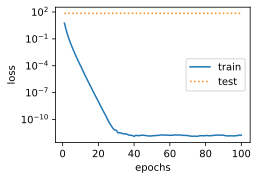

In [19]:
fit_and_plot(lambd=0)

L2 norm of w : 0.03965641185641289


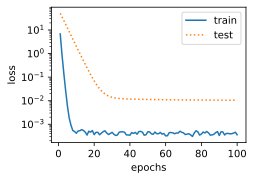

In [20]:
fit_and_plot(lambd=3)

In [21]:
def fit_and_plot2(wd):
    net = nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    
    optimizer_w = torch.optim.SGD(params=[net.weight],lr=lr,weight_decay=wd)
    optimizer_b = torch.optim.SGD(params=[net.bias],lr=lr)
    
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 11.744949340820312


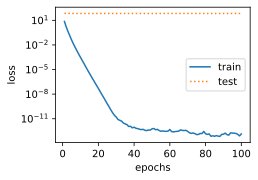

In [22]:
fit_and_plot2(0)

L2 norm of w: 0.04495720565319061


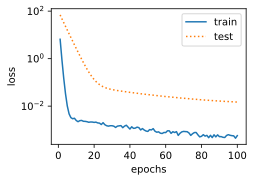

In [23]:
fit_and_plot2(3)